In [ ]:
from google.colab import files
uploaded = files.upload()


Saving phishing1111_final_clean.csv to phishing1111_final_clean.csv


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("phishing1111_final_clean.csv")
print("Dataset Loaded Successfully ✅")
df.head()


Dataset Loaded Successfully ✅


,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class,WebsiteCategory
0,1,-1,-1,1,1,1,-1,-1,0,-1,...,1,1,1,0,-1,1,1,1,-0.86,Shopping
1,2,1,-1,1,1,1,-1,-1,1,-1,...,1,-1,1,0,-1,1,0,1,1.15,Entertainment
2,3,-1,-1,1,1,1,-1,1,1,1,...,1,1,1,-1,-1,1,0,1,1.12,Entertainment
3,4,-1,-1,-1,1,-1,-1,1,1,-1,...,1,1,-1,1,-1,1,1,1,1.08,Entertainment
4,5,1,-1,1,1,1,-1,0,1,-1,...,1,1,1,-1,-1,1,0,1,0.99,Entertainment


In [ ]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Index                11054 non-null  int64  
 1   UsingIP              11054 non-null  int64  
 2   LongURL              11054 non-null  int64  
 3   ShortURL             11054 non-null  int64  
 4   Symbol@              11054 non-null  int64  
 5   Redirecting//        11054 non-null  int64  
 6   PrefixSuffix-        11054 non-null  int64  
 7   SubDomains           11054 non-null  int64  
 8   HTTPS                11054 non-null  int64  
 9   DomainRegLen         11054 non-null  int64  
 10  Favicon              11054 non-null  int64  
 11  NonStdPort           11054 non-null  int64  
 12  HTTPSDomainURL       11054 non-null  int64  
 13  RequestURL           11054 non-null  int64  
 14  AnchorURL            11054 non-null  int64  
 15  LinksInScriptTags    11054 non-null 

In [ ]:
df['class'] = df['class'].apply(lambda x: 1 if x > 0 else 0)
y = df['class']


In [ ]:
X = df.drop(['class', 'WebsiteCategory'], axis=1)
y = df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9678878335594754

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96       950
           1       0.96      0.98      0.97      1261

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



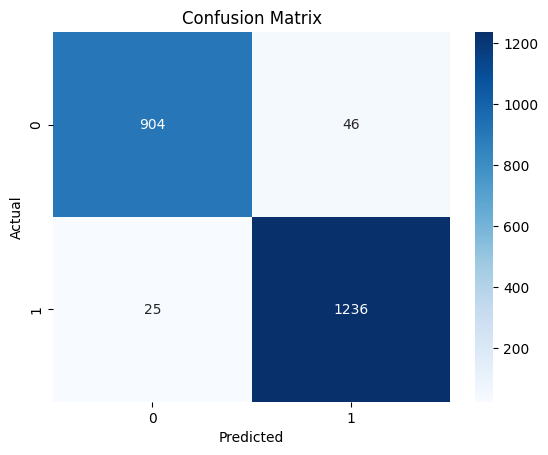

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()